In [1]:
import sys
import os

root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(root)

In [2]:
import numpy as np
import nest
import matplotlib.pyplot as plt

from params import pyr_hcamp_deco2012
from params import int_hcamp_deco2012
from scripts import visualizations
from scripts import initializations


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [3]:
nest.rng_seed = 1
np.random.seed(1)

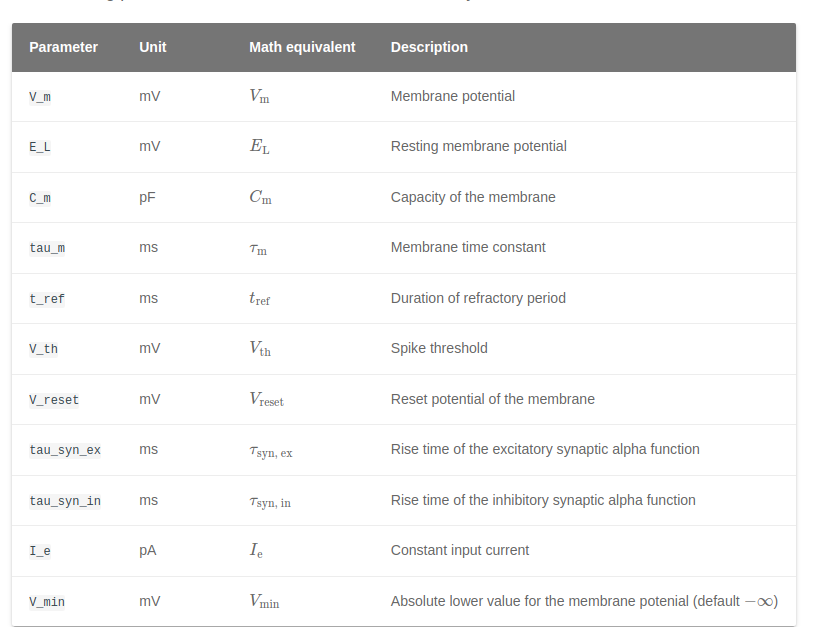

In [4]:
#Runtime
runtime = 200

#Gamma rate
gamma_rate = 40

#Theta rate 
theta_rate = 7

In [5]:
#Pyramidal neurons
pyr = initializations.initialize_neuron_group('iaf_psc_alpha', 206, pyr_hcamp_deco2012.params)

#Inter-neurons
inter = initializations.initialize_neuron_group('iaf_psc_alpha', 20, int_hcamp_deco2012.params)

In [6]:
#External inputs
ec_input = nest.Create('poisson_generator')
ec_input.set(rate=gamma_rate)
ec_parrot = nest.Create('parrot_neuron', n=20)
nest.Connect(ec_input, ec_parrot)

ca3_input = nest.Create('poisson_generator')
ca3_input.set(rate=gamma_rate)
ca3_parrot = nest.Create('parrot_neuron', n=20)
nest.Connect(ca3_input, ca3_parrot)

ms_input = nest.Create('poisson_generator')
ms_input.set(rate=theta_rate)
ms_parrot = nest.Create('parrot_neuron', n=10)
nest.Connect(ms_input, ms_parrot)

In [7]:
#Within-cell connections
nest.Connect(pyr, pyr, conn_spec = {'rule': 'pairwise_bernoulli', 'p': 0.2}, syn_spec={'weight': 20})
nest.Connect(inter, pyr, syn_spec={'weight': -10})

In [8]:
#Intra-cellular connections
nest.Connect(ec_parrot, pyr, syn_spec={'weight': 35})
nest.Connect(ec_parrot, inter, syn_spec={'weight': 16})
nest.Connect(ca3_parrot, pyr, syn_spec={'weight': 29})
nest.Connect(ca3_parrot, inter, syn_spec={'weight': 24})
nest.Connect(ms_parrot, inter, syn_spec={'weight': -5})

In [9]:
#Monitoring connections
Vm_recorder = nest.Create('multimeter')
Vm_recorder.set(record_from=['V_m'])
nest.Connect(Vm_recorder, pyr)
spike_recorder = nest.Create('spike_recorder')
nest.Connect(pyr, spike_recorder)

In [10]:
nest.Simulate(runtime)


Nov 29 16:47:37 NodeManager::prepare_nodes [Info]: 
    Preparing 281 nodes for simulation.

Nov 29 16:47:37 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 281
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Nov 29 16:47:37 SimulationManager::run [Info]: 
    Simulation finished.


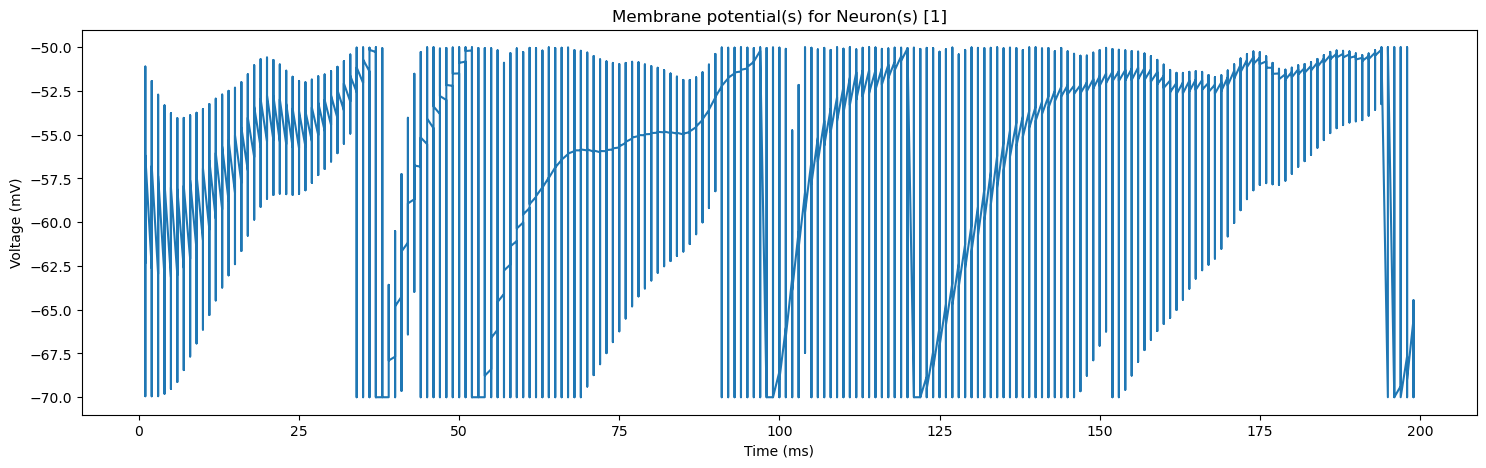

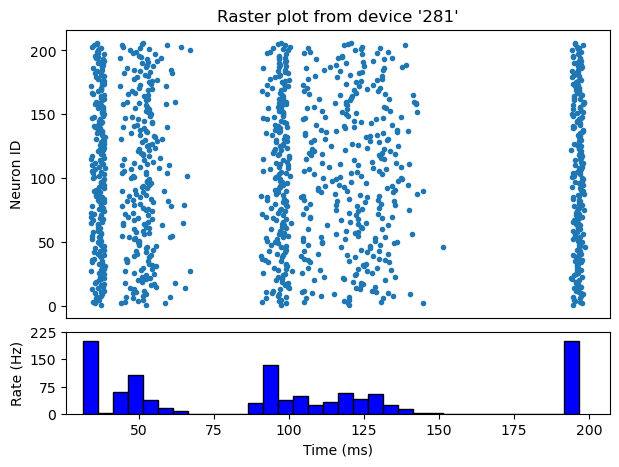

In [11]:
visualizations.plot_vms_from_device(Vm_recorder, [1])
nest.raster_plot.from_device(spike_recorder)